## Content

### 1. Introduction

**Problem Statement:** A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
2. A sizeable department has to be maintained, for the purposes of recruiting new talent
3. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

**Goal of the case study** You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

### 2. Data Review

HR Analytics Dataset which used in this case study has taken from Kaggle. We had three different data frame related to the same case at the beginning. Then have merged all of them in best way. At the starting of the project, we are going to have clear and only one data frame to study. We have 29 variables and 4410 observations on dataset. 

*see for datasets: https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study*

#### Variables and Explanations

In [614]:
dictionary = pd.read_csv('data_dictionary.csv').dropna()
dictionary

,Variable,Meaning
0,Age,Age of the employee
1,Attrition,Whether the employee left in the previous year...
2,BusinessTravel,How frequently the employees travelled for bus...
3,Department,Department in company
4,DistanceFromHome,Distance from home in kms
5,Education,Education Level
10,EducationField,Field of education
11,EmployeeCount,Employee count
12,EmployeeNumber,Employee number/id
13,EnvironmentSatisfaction,Work Environment Satisfaction Level


### 3. Data Preprocessing

**In this chapter**, we have combined **'general_data', 'employee_survey_data'** and **'manager_survey_data'**. All are including important informations collected by human resource department of the company. 

### 3.1. Creating Our Dataset

In [1]:
import pandas as pd

In [598]:
general = pd.read_csv('general_data.csv')
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [205]:
general.shape

(4410, 24)

In [206]:
employee = pd.read_csv('employee_survey_data.csv')
employee.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [207]:
employee.shape

(4410, 4)

In [208]:
manager = pd.read_csv('manager_survey_data.csv')
manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [209]:
manager.shape

(4410, 3)

In [210]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [620]:
data = pd.merge(general, manager, on = 'EmployeeID')
df = pd.merge(data, employee, on = 'EmployeeID')

#### Dropping useless columns

In [622]:
df = df.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'], axis = 1)

#### Current dataframe

In [623]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


### 3.2. Data Cleaning

#### Missing Data

Here, we see that we are facing a small amount of missing values. Then we have filled them with the most frequent values of the columns.

In [212]:
fill_list = []
for i in range(len(df.columns)):
    if df.isnull().sum()[i]>0:
        fill_list.append(df.columns[i])

In [615]:
print('Data types of missing values \n','--'*10)
for item in fill_list:
    print(item, ', type:', type(df[item][5]))
    print('--'*20)

Data types of missing values 
 --------------------
NumCompaniesWorked , type: <class 'numpy.float64'>
----------------------------------------
TotalWorkingYears , type: <class 'numpy.float64'>
----------------------------------------
EnvironmentSatisfaction , type: <class 'numpy.float64'>
----------------------------------------
JobSatisfaction , type: <class 'numpy.float64'>
----------------------------------------
WorkLifeBalance , type: <class 'numpy.float64'>
----------------------------------------


In [214]:
pers = ((df[fill_list].isnull().sum()/4410)*100)

print('Missing Value Percentage \n','--'*10)
for item in fill_list:
    print(item, round(pers[item],2),'%')

Missing Value Percentage 
 --------------------
NumCompaniesWorked 0.43 %
TotalWorkingYears 0.2 %
EnvironmentSatisfaction 0.57 %
JobSatisfaction 0.45 %
WorkLifeBalance 0.86 %


In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

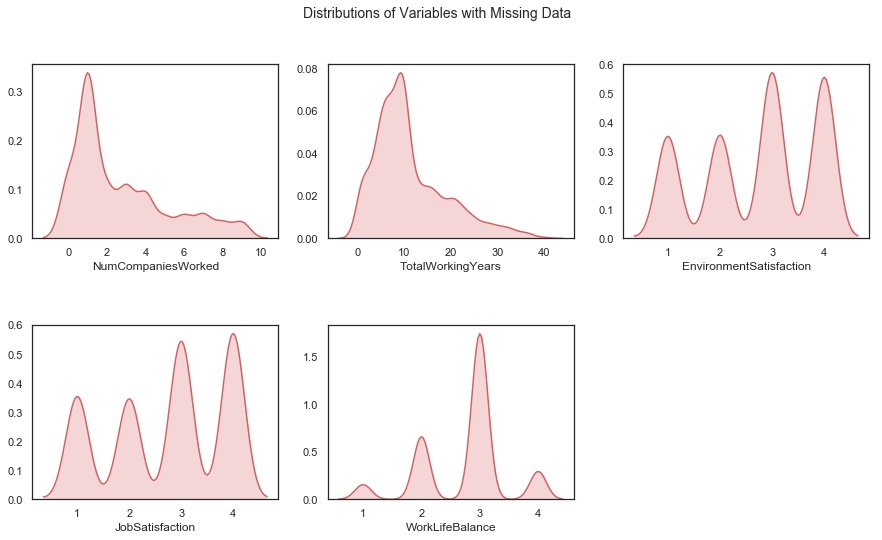

In [619]:
plt.figure(figsize = (15,8))
plt.suptitle('Distributions of Variables with Missing Data', size = 14)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(2,3,1)
sns.distplot(df.NumCompaniesWorked, hist=False, color="r", kde_kws={"shade": True})
plt.subplot(2,3,2)
sns.distplot(df.TotalWorkingYears, hist=False, color="r", kde_kws={"shade": True})
plt.subplot(2,3,3)
sns.distplot(df.EnvironmentSatisfaction, hist=False,color="r", kde_kws={"shade": True})
plt.subplot(2,3,4)
sns.distplot(df.JobSatisfaction, hist=False, color="r", kde_kws={"shade": True})
plt.subplot(2,3,5)
sns.distplot(df.WorkLifeBalance, hist=False, color="r", kde_kws={"shade": True})
plt.show()

Right filling method seems here, filling with mostly repeated one. By the way, we have too little amount of missing data, so it does not matter what method we used for filling.

In [219]:
for i in range(0,5):
    
    df[fill_list[i]] = df[fill_list[i]].fillna(df[fill_list[i]].mode()[0]) 

In [626]:
print('Number of Missing Values at the end of process:\n','--'*20)
print(df[fill_list].isnull().sum())

Number of Missing Values at the end of process:
 ----------------------------------------
NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


### Data Exploration

Our purose here, mostly, understanding which and how variables are related to 'Attrition'. Who wants to leave the company and why? So we made it 'Attrition' oriented.

#### Attrition

Attrition means the employees who quit, fired, resign their job. If it is 'yes', the employee is no more working at the company.

In [646]:
print('Total Attrition Number is', df.Attrition.value_counts()[1])

Total Attrition Number is 711


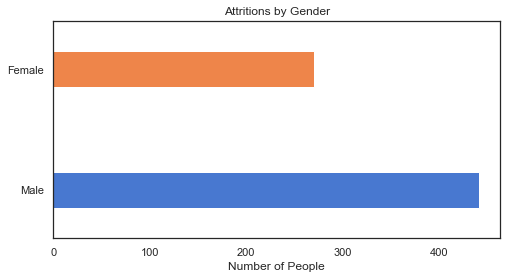

In [647]:
plt.figure(figsize = (8,4))
df[df['Attrition']=='Yes']['Gender'].value_counts().plot(kind = 'barh', width = 0.3)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Number of People')
plt.title('Attritions by Gender')
plt.show()

In [648]:
attrition_per = (df[df['Attrition']=='Yes'].shape[0]/df.shape[0])*100

print('Ratio of employees who left the job:', round(attrition_per,2),'%')

Ratio of employees who left the job: 16.12 %


#### Gender

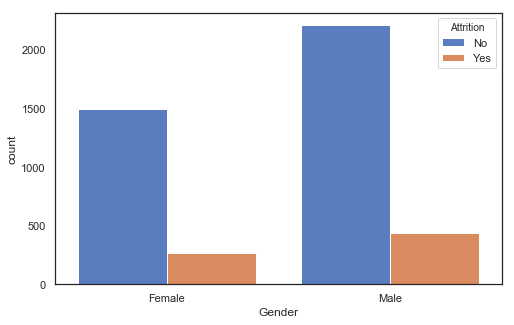

In [650]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Gender', hue = 'Attrition', data = df)
plt.show()

In [290]:
gen_count = df['Gender'].value_counts()
gen_per = (gen_count/4410)*100
gen_yes = df[df['Attrition']=='Yes']['Gender'].value_counts()

print('Male Percentage of Observations:', gen_per[0],'%')
print('Female Percentage of Observations:', gen_per[1],'%')
print('--'*20)
print('Male Left Job Percentage:',round((gen_yes[0]/gen_count[0])*100,2), '%')
print('Female Left Job Percentage:',round((gen_yes[1]/gen_count[1])*100,2), '%')

Male Percentage of Observations: 60.0 %
Female Percentage of Observations: 40.0 %
----------------------------------------
Male Left Job Percentage: 16.67 %
Female Left Job Percentage: 15.31 %


**Ratio of males and females who left the job is approximately same. We can see here, gender is not an indicator itself. Our initial hypotesis here is that, it is not about genders.**

#### Age - Gender

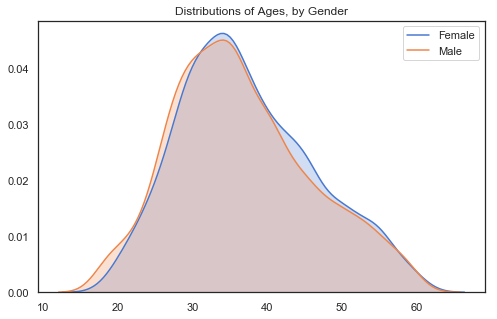

In [268]:
plt.figure(figsize = (8,5))
sns.kdeplot(data=female_age, label="Female", shade=True)
sns.kdeplot(data=male_age, label="Male", shade=True)

plt.title("Distributions of Ages, by Gender")
plt.legend()
plt.show()

**Age distribution is balanced between genders.**

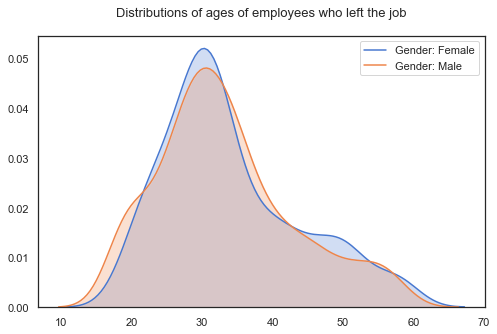

In [654]:
fem_age_yes = df[(df['Gender']=='Female') & (df['Attrition']=='Yes')]['Age']
male_age_yes = df[(df['Gender']=='Male') & (df['Attrition']=='Yes')]['Age']

plt.figure(figsize = (8,5))
sns.kdeplot(data=fem_age_yes, label="Gender: Female", shade=True)
sns.kdeplot(data=male_age_yes, label="Gender: Male", shade=True)

plt.title("Distributions of ages of employees who left the job\n", size = 13)
plt.legend()
plt.show()

**We do not see any correlations between age and genders of employees who left the job.**

#### Bussiness Travel

In [247]:
print('There are three type of travel frequency:','Travel_Rarely,', 'Travel_Frequently,', 'Non-Travel')

There are three type of travel frequency: Travel_Rarely, Travel_Frequently, Non-Travel


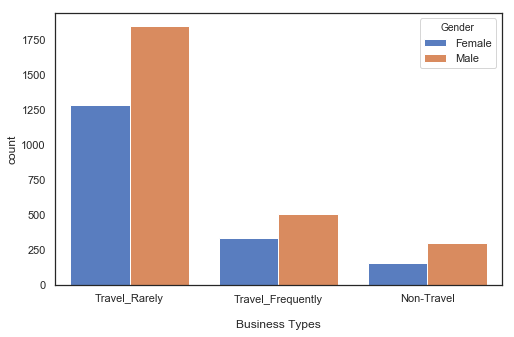

In [638]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'BusinessTravel', hue = 'Gender', data = df)
plt.xlabel('\nBusiness Types')
plt.show()

In [294]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [293]:
df[df['Attrition']=='Yes']['BusinessTravel'].value_counts()

Travel_Rarely        468
Travel_Frequently    207
Non-Travel            36
Name: BusinessTravel, dtype: int64

In [639]:
print('Travel Types Percentages:','\n', '--'*20)
print('Travel Rarely per.:', round((3129/4410)*100,2), '%')
print('Travel Frequently per.:', round((831/4410)*100,2), '%')
print('Non Travel per.:', round((450/4410)*100,2), '%\n')

print('Resign Ratios by Travel Frequency:','\n', '--'*20)
print('Travel Rarely per.:', round((468/3129)*100,2), '%')
print('Travel Frequently per.:', round((207/831)*100,2), '%')
print('Non Travel per.:', round((36/450)*100,2), '%\n')

Travel Types Percentages: 
 ----------------------------------------
Travel Rarely per.: 70.95 %
Travel Frequently per.: 18.84 %
Non Travel per.: 10.2 %

Resign Ratios by Travel Frequency: 
 ----------------------------------------
Travel Rarely per.: 14.96 %
Travel Frequently per.: 24.91 %
Non Travel per.: 8.0 %



**Here, we have seen something remarkable, the biggest resign ratio belongs to frequently traveling employees.**

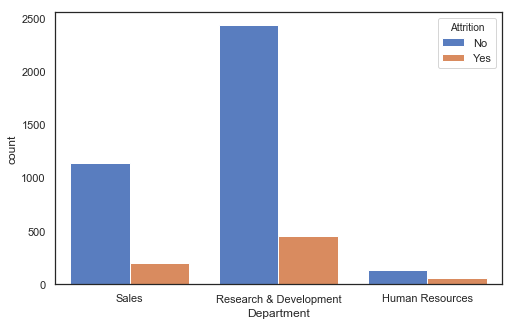

In [314]:
# departmanlar

plt.figure(figsize = (8,5))
sns.countplot(x = 'Department', hue = 'Attrition', data = df)
plt.show()

In [655]:
print('Resign Ratios by Departments', '\n','--'*20)
print(round(df[df['Attrition']=='Yes']['Department'].value_counts() / df['Department'].value_counts()*100,2),2)

Resign Ratios by Departments 
 ----------------------------------------
Research & Development    15.71
Sales                     15.02
Human Resources           30.16
Name: Department, dtype: float64 2


**Human Resources Department has the highest resign ratio. R&D and Sales Department is nearly same.**

#### Distance from home in kilometers

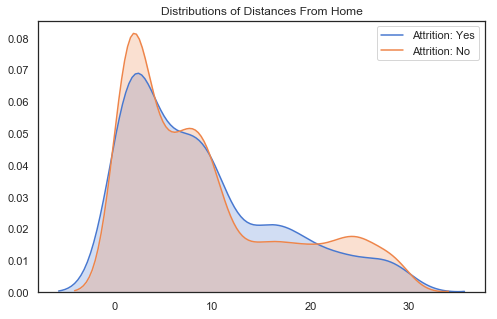

In [382]:
dist_yes = df[df['Attrition']=='Yes']['DistanceFromHome']
dist_no = df[df['Attrition']=='No']['DistanceFromHome']

plt.figure(figsize = (8,5))
sns.kdeplot(data=dist_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=dist_no, label="Attrition: No", shade=True)

plt.title("Distributions of Distances From Home")
plt.legend()
plt.show()

**Here, no correlation seen between the attritions and distances from home.**

#### Education Levels
1: 'Below College'
2: 'College'
3: 'Bachelor'
4: 'Master'
5: 'Doctor'

In [346]:
df['Education_str'] = df['Education'].replace({1:'Below College', 2:'College',
                                              3:'Bachelor', 4:'Master', 5:'Doctor'})

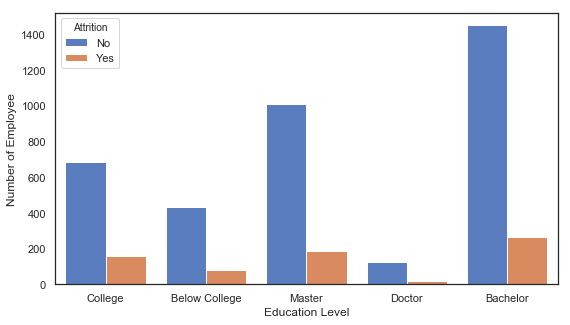

In [355]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'Education_str', hue = 'Attrition', data=df)
plt.xlabel('Education Level')
plt.ylabel('Number of Employee')
plt.show()

In [429]:
edu_lev_per = df[df['Attrition']=='Yes']['Education_str'].value_counts()/df['Education_str'].value_counts()*100

In [430]:
print('Resing Ratios (%) by Education Level\n', '--'*20,'\n', round(edu_lev_per,2))

Resing Ratios (%) by Education Level
 ---------------------------------------- 
 Bachelor         15.56
Master           15.58
College          18.79
Below College    15.29
Doctor           14.58
Name: Education_str, dtype: float64


**For all education levels, resign ratios are nearly same, only college ratio is slightly different but not too much.**

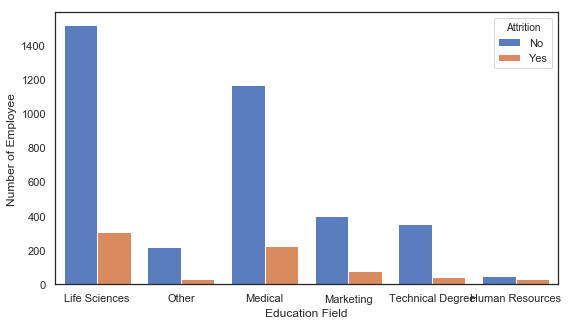

In [370]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'EducationField', hue = 'Attrition', data=df)
plt.xlabel('Education Field')
plt.ylabel('Number of Employee')
plt.show()

In [372]:
edu_field_per = df[df['Attrition']=='Yes']['EducationField'].value_counts()/df['EducationField'].value_counts()*100

In [426]:
print('Resing Ratios (%) by Education Field\n', '--'*20,'\n', round(edu_field_per),2)

Resing Ratios (%) by Education Field
 ---------------------------------------- 
 Human Resources     41.0
Life Sciences       17.0
Marketing           16.0
Medical             16.0
Other               12.0
Technical Degree    11.0
Name: EducationField, dtype: float64 2


**Human resources has the highest ratio again. There should be a problem!**

**Job Level**

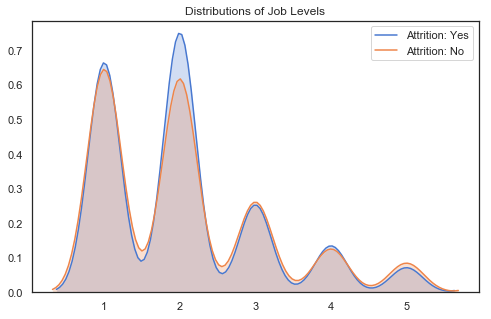

In [383]:
job_level_yes = df[df['Attrition']=='Yes']['JobLevel']
job_level_no = df[df['Attrition']=='No']['JobLevel']

plt.figure(figsize = (8,5))
sns.kdeplot(data=job_level_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=job_level_no, label="Attrition: No", shade=True)

plt.title("Distributions of Job Levels")
plt.legend()
plt.show()

In [425]:
job_lev_per = (df[df['Attrition']=='Yes']['JobLevel'].value_counts()/df.JobLevel.value_counts())*100
print('Resign Ratios (%) by Job Level\n', '--'*20,'\n', round(job_lev_per),2)

Resign Ratios (%) by Job Level
 ---------------------------------------- 
 1    15.0
2    18.0
3    15.0
4    16.0
5    13.0
Name: JobLevel, dtype: float64 2


**2. scaleda ufak da olsa bir yükselme söz konusu**

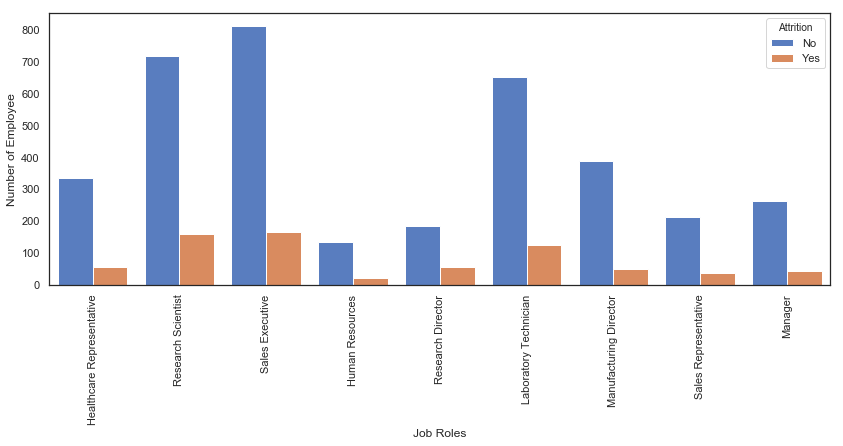

In [394]:
# Job Role

plt.figure(figsize=(14,5))
sns.countplot(x = 'JobRole', hue = 'Attrition', data=df)
plt.xlabel('Job Roles')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Employee')
plt.show()

In [424]:
job_role_per = (df[df['Attrition']=='Yes']['JobRole'].value_counts()/df.JobRole.value_counts())*100
print('Resign Ratios (%) by Job Role\n', '--'*20,'\n',round(job_role_per),2)


Resign Ratios (%) by Job Role
 ---------------------------------------- 
 Healthcare Representative    15.0
Human Resources              13.0
Laboratory Technician        16.0
Manager                      14.0
Manufacturing Director       11.0
Research Director            24.0
Research Scientist           18.0
Sales Executive              17.0
Sales Representative         14.0
Name: JobRole, dtype: float64 2


**Research directorların ayrılma oranının yüksek olduğunu görüyoruz**

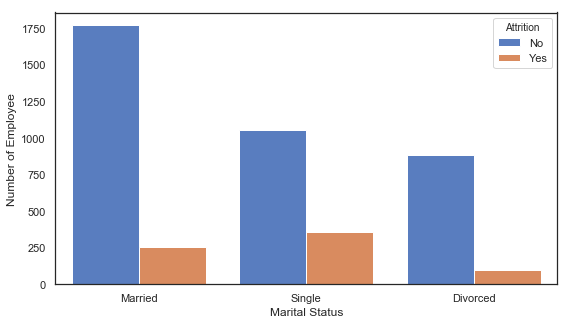

In [396]:
# marital status

plt.figure(figsize=(9,5))
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Number of Employee')
plt.show()

In [423]:
marital_per = (df[df['Attrition']=='Yes']['MaritalStatus'].value_counts()/df.MaritalStatus.value_counts())*100
print('Resign Ratios (%) by Marital Status\n', '--'*20,'\n', round(marital_per,2))

Resign Ratios (%) by Marital Status
 ---------------------------------------- 
 Divorced    10.09
Married     12.48
Single      25.53
Name: MaritalStatus, dtype: float64


**Bekarların işten çıkma olasılığı biraz daha fazla**

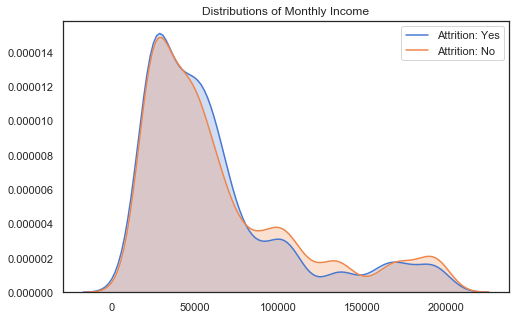

In [404]:
# monthly income

income_yes = df[df['Attrition']=='Yes']['MonthlyIncome']
income_no = df[df['Attrition']=='No']['MonthlyIncome']

plt.figure(figsize = (8,5))
sns.kdeplot(data=income_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=income_no, label="Attrition: No", shade=True)

plt.title("Distributions of Monthly Income")
plt.legend()
plt.show()

In [405]:
print('P-Value of T Test on Monthly Incomes by Attrition:', ttest_ind(income_yes, income_no)[1])

P-Value of T Test on Monthly Incomes by Attrition: 0.03842748490605113


**P value muz küçük çıktı. Yani aradaki farklılıkların anlamlı olduğunu söyleyebiliriz.**

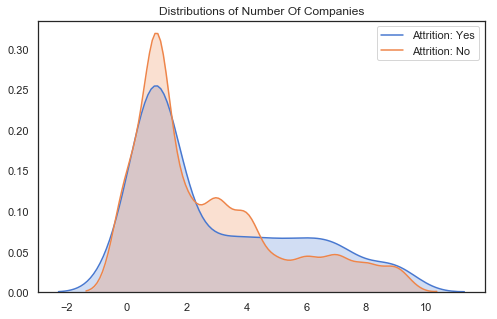

In [408]:
# Over18 kolonu drop

# num companies worked

num_com_yes = df[df['Attrition']=='Yes']['NumCompaniesWorked']
num_com_no = df[df['Attrition']=='No']['NumCompaniesWorked']

plt.figure(figsize = (8,5))
sns.kdeplot(data=num_com_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=num_com_no, label="Attrition: No", shade=True)

plt.title("Distributions of Number Of Companies")
plt.legend()
plt.show()

In [421]:
print('Num. Company Worked and Mean Age:\n','--'*20,)
for i in range(0,9):
    print('Num. Company:',i, 'Mean Age:', round(df[df['NumCompaniesWorked']==i]['Age'].mean(),2))

Num. Company Worked and Mean Age:
 ----------------------------------------
Num. Company: 0 Mean Age: 34.23
Num. Company: 1 Mean Age: 32.49
Num. Company: 2 Mean Age: 41.16
Num. Company: 3 Mean Age: 41.23
Num. Company: 4 Mean Age: 41.57
Num. Company: 5 Mean Age: 38.92
Num. Company: 6 Mean Age: 38.99
Num. Company: 7 Mean Age: 40.88
Num. Company: 8 Mean Age: 41.04


In [422]:
num_com_per = (df[df['Attrition']=='Yes']['NumCompaniesWorked'].value_counts()/df.NumCompaniesWorked.value_counts())*100
print('Resign Ratios (%) by Number of Companies Worked\n', '--'*20,'\n',round(num_com_per,2))

Resign Ratios (%) by Number of Companies Worked
 ---------------------------------------- 
 0.0    11.77
1.0    18.83
2.0    10.96
3.0    10.13
4.0    12.05
5.0    24.60
6.0    23.08
7.0    22.97
8.0    12.24
9.0    23.08
Name: NumCompaniesWorked, dtype: float64


In [437]:
# percent salary hike for last year

# Income equality

group_salary = df['MonthlyIncome'].groupby(df['Gender'])
print('Average of Salaries by Gender:\n', '--'*10, '\n' ,group_salary.mean(), '\n')

group_hike = df['PercentSalaryHike'].groupby(df['Gender'])
print('Average of Hikes by Gender:\n', '--'*10, '\n' ,group_hike.mean())

Average of Salaries by Gender:
 -------------------- 
 Gender
Female    64595.255102
Male      65318.684807
Name: MonthlyIncome, dtype: float64 

Average of Hikes by Gender:
 -------------------- 
 Gender
Female    15.156463
Male      15.244898
Name: PercentSalaryHike, dtype: float64


**Ortalama maaşlar ve ortalama zamlar eşit miktarda. Şirkette cinsiyetler arası gelir eşitliği var**

In [ ]:
# standard hours drop

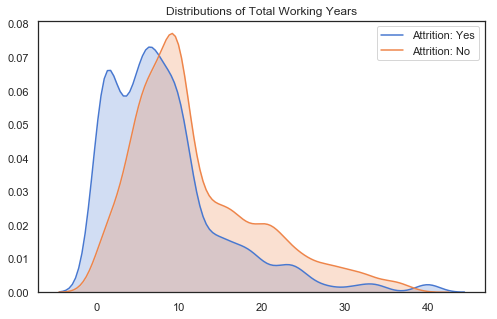

In [439]:
# total working years

work_year_yes = df[df['Attrition']=='Yes']['TotalWorkingYears']
work_year_no = df[df['Attrition']=='No']['TotalWorkingYears']

plt.figure(figsize = (8,5))
sns.kdeplot(data=work_year_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=work_year_no, label="Attrition: No", shade=True)

plt.title("Distributions of Total Working Years")
plt.legend()
plt.show()

**Az çalışanlarda biraz daha fazla ayrılma oranı var

In [523]:
work_year_per = (df[df['Attrition']=='Yes']['TotalWorkingYears'].value_counts()/df.TotalWorkingYears.value_counts())*100
work_year_per = work_year_per[0:34].interpolate()

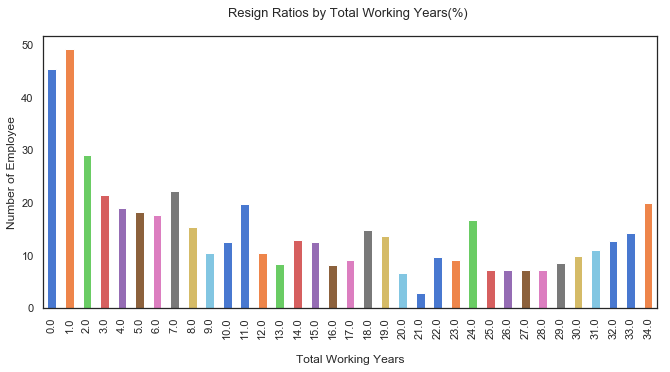

In [524]:
plt.figure(figsize = (11,5))
work_year_per.plot(kind = 'bar')
plt.xlabel('\nTotal Working Years')
plt.ylabel('Number of Employee')
plt.title('Resign Ratios by Total Working Years(%) \n', size = 13)
plt.show()

**İş tecrübesi arttıkça işten çıkmalarda azalma trendi gözlemledik.**

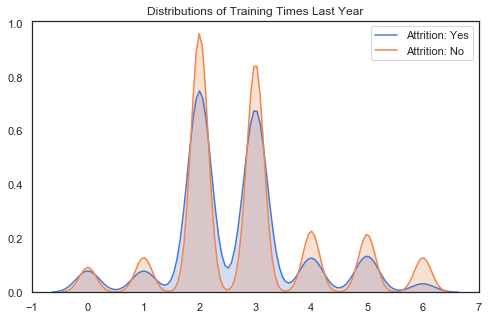

In [476]:
# TrainingTimesLastYear

training_yes = df[df['Attrition']=='Yes']['TrainingTimesLastYear']
training_no = df[df['Attrition']=='No']['TrainingTimesLastYear']

plt.figure(figsize = (8,5))
sns.kdeplot(data=training_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=training_no, label="Attrition: No", shade=True)

plt.title("Distributions of Training Times Last Year")
plt.legend()
plt.show()

In [486]:
print('Training Times Per Employees Left the Job:',round(training_yes.mean(),2),'\n','--'*20)
print('Training Times Per Employees Still Working:',round(training_no.mean(),2))

Training Times Per Employees Left the Job: 2.65 
 ----------------------------------------
Training Times Per Employees Still Working: 2.83


**İşten ayrılanlar az da olsa daha az eğitime tabi tutulmuşlar.**

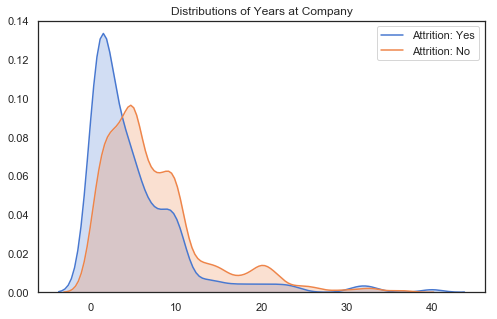

In [508]:
## years at company

years_yes = df[df['Attrition']=='Yes']['YearsAtCompany']
years_no = df[df['Attrition']=='No']['YearsAtCompany']

plt.figure(figsize = (8,5))
sns.kdeplot(data=years_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=years_no, label="Attrition: No", shade=True)

plt.title("Distributions of Years at Company")
plt.legend()
plt.show()

In [531]:
years_per = (years_yes.value_counts()/years_no.value_counts())*100
years_per = years_per[0:23].interpolate()

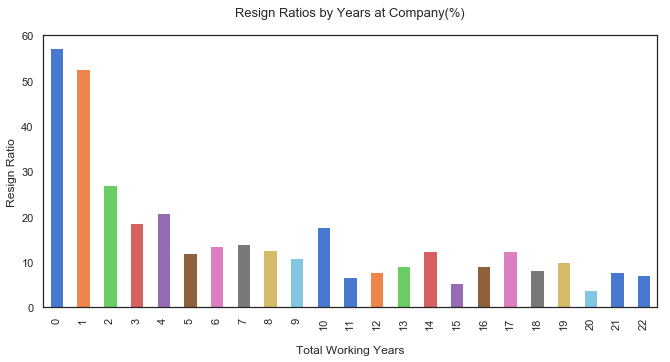

In [537]:
plt.figure(figsize = (11,5))
years_per.plot(kind = 'bar')
plt.xlabel('\nTotal Working Years')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Years at Company(%)\n', size = 13)
plt.show()

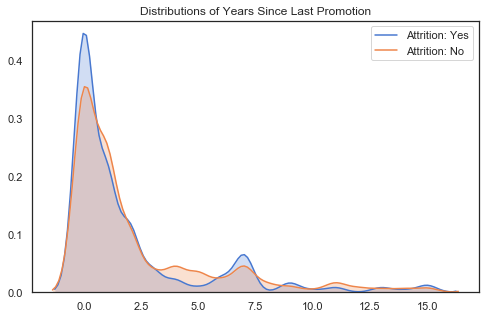

In [534]:
# years since last promotion

prom_yes = df[df['Attrition']=='Yes']['YearsSinceLastPromotion']
prom_no = df[df['Attrition']=='No']['YearsSinceLastPromotion']

plt.figure(figsize = (8,5))
sns.kdeplot(data=prom_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=prom_no, label="Attrition: No", shade=True)

plt.title("Distributions of Years Since Last Promotion")
plt.legend()
plt.show()

**Elimizdeki veri bu konu ile ilgili sağlıklı bir bilgi sunmuyor.**

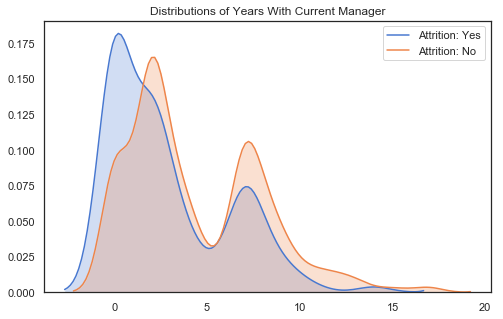

In [540]:
# YearsWithCurrManager

manager_yes = df[df['Attrition']=='Yes']['YearsWithCurrManager']
manager_no = df[df['Attrition']=='No']['YearsWithCurrManager']

plt.figure(figsize = (8,5))
sns.kdeplot(data=manager_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=manager_no, label="Attrition: No", shade=True)

plt.title("Distributions of Years With Current Manager")
plt.legend()
plt.show()

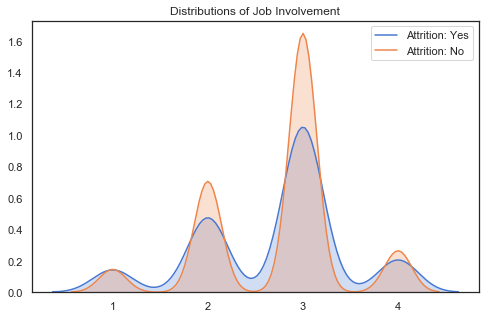

In [560]:
# JobInvolvement
job_yes = df[df['Attrition']=='Yes']['JobInvolvement']
job_no = df[df['Attrition']=='No']['JobInvolvement']

plt.figure(figsize = (8,5))
sns.kdeplot(data=job_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=job_no, label="Attrition: No", shade=True)

plt.title("Distributions of Job Involvement")
plt.legend()
plt.show()

In [555]:
job_per = (job_yes.value_counts()/job_no.value_counts())*100

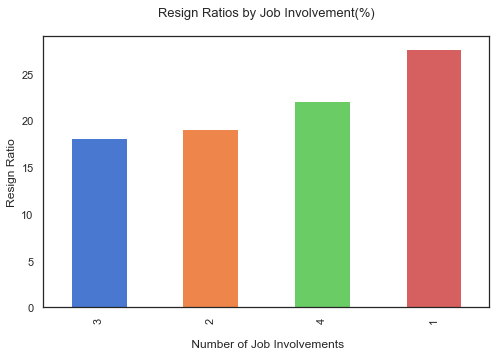

In [559]:
plt.figure(figsize = (8,5))
job_per.plot(kind = 'bar')
plt.xlabel('\n Number of Job Involvements')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Job Involvement(%)\n', size = 13)
plt.show()

**Daha önce ne kadar az işe girilmişse işten ayrılma olasılığı da o kadar fazla olacaktır.**

In [569]:
# performance rating

performance_data = df[df['Attrition'] == 'Yes'][['PerformanceRating', 'Age']]

print('Number of Employees Left the Job by Performance Rating:\n','--'*25)
print(performance_data.PerformanceRating.value_counts())

Number of Employees Left the Job by Performance Rating:
 --------------------------------------------------
3    588
4    123
Name: PerformanceRating, dtype: int64


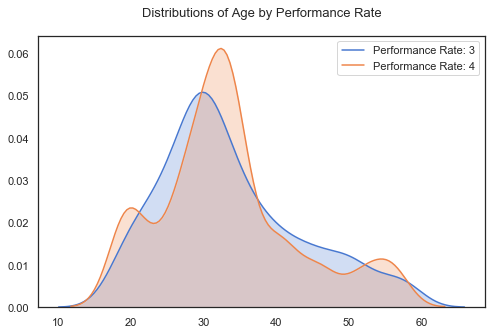

In [580]:
perfor_yes = df[(df['Attrition']=='Yes')&(df['PerformanceRating']==3)]['Age']
perfor_no = df[(df['Attrition']=='Yes')&(df['PerformanceRating']==4)]['Age']

plt.figure(figsize = (8,5))
sns.kdeplot(data=perfor_yes, label="Performance Rate: 3", shade=True)
sns.kdeplot(data=perfor_no, label="Performance Rate: 4", shade=True)

plt.title("Distributions of Age by Performance Rate\n", size = 13)
plt.legend()
plt.show()

**İşten ayrılanların büyük çoğunluğu performans rate leri düşük olan çalışanlar.**
**Yaş ile performance rate arasında ise tutarlı bir ilişki bulunmamakta.**

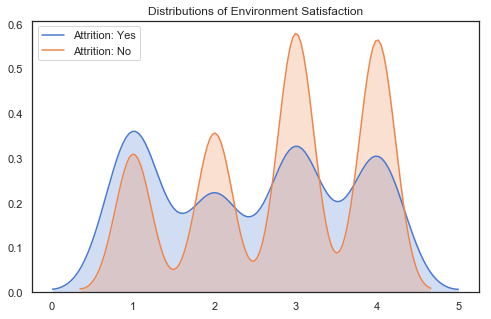

In [581]:
# environment satisfaction

sat_yes = df[df['Attrition']=='Yes']['EnvironmentSatisfaction']
sat_no = df[df['Attrition']=='No']['EnvironmentSatisfaction']

plt.figure(figsize = (8,5))
sns.kdeplot(data=sat_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=sat_no, label="Attrition: No", shade=True)

plt.title("Distributions of Environment Satisfaction")
plt.legend()
plt.show()

In [585]:
sat_per = (sat_yes.value_counts()/sat_no.value_counts())*100

print('Resign Ratio by Environment Satisfaction:\n','--'*20, '\n', round(sat_per,2))

Resign Ratio by Environment Satisfaction:
 ---------------------------------------- 
 1.0    33.70
2.0    17.58
3.0    16.13
4.0    15.50
Name: EnvironmentSatisfaction, dtype: float64


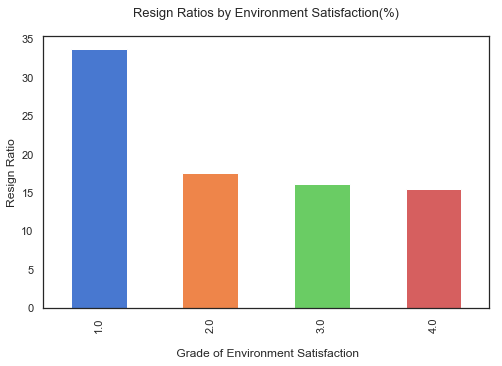

In [589]:
plt.figure(figsize = (8,5))
sat_per.plot(kind = 'bar')
plt.xlabel('\n Grade of Environment Satisfaction')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Environment Satisfaction(%)\n', size = 13)
plt.show()

**Environment satisfaction düşük olan çalışanların işten ayrılma oranları önemli ölçüde daha yüksek.**

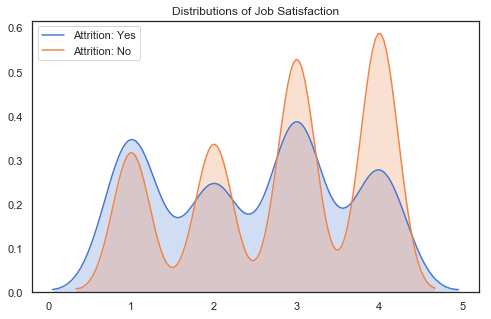

In [590]:
# job satisfaction

job_sat_yes = df[df['Attrition']=='Yes']['JobSatisfaction']
job_sat_no = df[df['Attrition']=='No']['JobSatisfaction']

plt.figure(figsize = (8,5))
sns.kdeplot(data=job_sat_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=job_sat_no, label="Attrition: No", shade=True)

plt.title("Distributions of Job Satisfaction")
plt.legend()
plt.show()

In [591]:
job_sat_per = (job_sat_yes.value_counts()/job_sat_no.value_counts())*100

print('Resign Ratio by Environment Satisfaction:\n','--'*20, '\n', round(job_sat_per,2))

Resign Ratio by Environment Satisfaction:
 ---------------------------------------- 
 1.0    29.71
2.0    19.66
3.0    19.84
4.0    12.76
Name: JobSatisfaction, dtype: float64


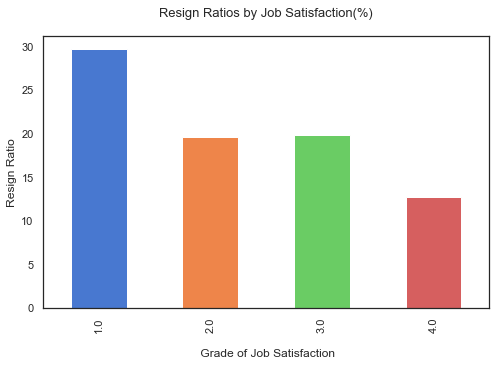

In [594]:
plt.figure(figsize = (8,5))
job_sat_per.plot(kind = 'bar')
plt.xlabel('\n Grade of Job Satisfaction')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Job Satisfaction(%)\n', size = 13)
plt.show()

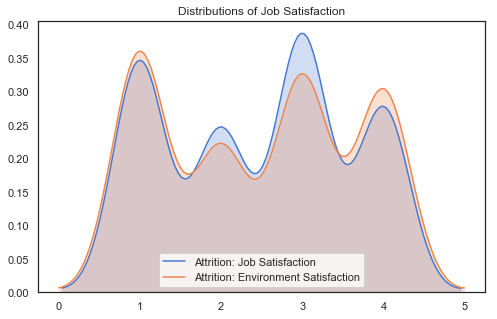

In [593]:
plt.figure(figsize = (8,5))
sns.kdeplot(data=job_sat_yes, label="Attrition: Job Satisfaction", shade=True)
sns.kdeplot(data=sat_yes, label="Attrition: Environment Satisfaction", shade=True)

plt.title("Distributions of Job Satisfaction")
plt.legend()
plt.show()

**Job satisfaction ile environment satisfaction birbiriyle büyük oranda örtüşüyor. Satisfactionu 1 olanlarda işten ayrılma oranı yüksek**

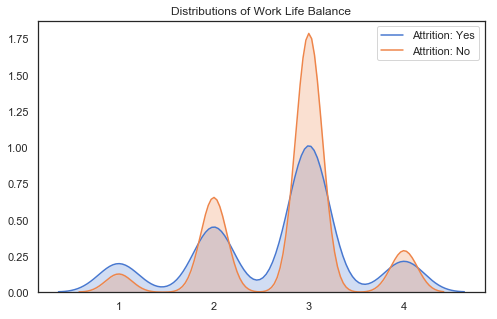

In [595]:
# work life balance

balance_yes = df[df['Attrition']=='Yes']['WorkLifeBalance']
balance_no = df[df['Attrition']=='No']['WorkLifeBalance']

plt.figure(figsize = (8,5))
sns.kdeplot(data=balance_yes, label="Attrition: Yes", shade=True)
sns.kdeplot(data=balance_no, label="Attrition: No", shade=True)

plt.title("Distributions of Work Life Balance")
plt.legend()
plt.show()

In [596]:
balance_per = (balance_yes.value_counts()/balance_no.value_counts())*100

print('Resign Ratio by Work Life Balance:\n','--'*20, '\n', round(balance_per,2))

Resign Ratio by Work Life Balance:
 ---------------------------------------- 
 3.0    16.59
2.0    20.17
4.0    21.72
1.0    45.73
Name: WorkLifeBalance, dtype: float64


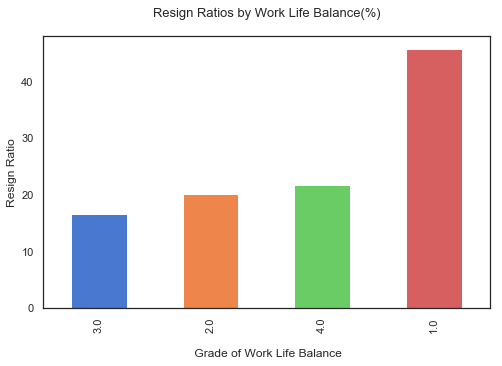

In [597]:
plt.figure(figsize = (8,5))
balance_per.plot(kind = 'bar')
plt.xlabel('\n Grade of Work Life Balance')
plt.ylabel('Resign Ratio')
plt.title('Resign Ratios by Work Life Balance(%)\n', size = 13)
plt.show()

**Work life balance ı düşük olanların işten ayrılma yüzdeleri ciddi anlamda çok yüksek.**